# Selective Withdrawal Phenomena and Entrainment

Here we'll study the critical moment when the withdrawal Phenomena transitions from selective to entrainment.

In [6]:
import myload01 as ml01

folder_path = 'C:\\Users\\sabbi\\Dropbox\\Darryl_James\\Mendeley_library\\JetEntrainment\\Selective\\Qualifying_docs\\SW_Python\\input'
ml01.disp_files_folder(folder_path)


 Files in the folders are: 

C:\Users\sabbi\Dropbox\Darryl_James\Mendeley_library\JetEntrainment\Selective\Qualifying_docs\SW_Python\input\cohen.csv
C:\Users\sabbi\Dropbox\Darryl_James\Mendeley_library\JetEntrainment\Selective\Qualifying_docs\SW_Python\input\Lubin_Data.csv
C:\Users\sabbi\Dropbox\Darryl_James\Mendeley_library\JetEntrainment\Selective\Qualifying_docs\SW_Python\input\single.csv
C:\Users\sabbi\Dropbox\Darryl_James\Mendeley_library\JetEntrainment\Selective\Qualifying_docs\SW_Python\input\utube.csv




In [7]:
file_name = 'C:\\Users\\sabbi\\Dropbox\\Darryl_James\\Mendeley_library\\JetEntrainment\\Selective\\Qualifying_docs\\SW_Python\\input\\single.csv' 
data_single = ml01.load_csv(file_name)

file_name = 'C:\\Users\\sabbi\\Dropbox\\Darryl_James\\Mendeley_library\\JetEntrainment\\Selective\\Qualifying_docs\\SW_Python\\input\\utube.csv' 
data_utube = ml01.load_csv(file_name)

file_name = 'C:\\Users\\sabbi\\Dropbox\\Darryl_James\\Mendeley_library\\JetEntrainment\\Selective\\Qualifying_docs\\SW_Python\\input\\cohen.csv' 
data_cohen = ml01.load_csv(file_name)

file_name = 'C:\\Users\\sabbi\\Dropbox\\Darryl_James\\Mendeley_library\\JetEntrainment\\Selective\\Qualifying_docs\\SW_Python\\input\\Lubin_Data.csv' 
data_lubin = ml01.load_csv(file_name)

import expdataproc as eprc 

data_single = eprc.proc_single(data_single)
data_utube = eprc.proc_utube(data_utube)
data_cohen = eprc.proc_cohen(data_cohen)
data_lubin = eprc.proc_lubin(data_lubin)

# Preparing for total data:

data_utube['fluids'] = data_utube['fluids'] + 10
data_cohen['fluids'] = data_cohen['fluids'] + 20
data_lubin['fluids'] = data_lubin['fluids'] + 30


In [8]:
import pandas as pd

total_data = pd.concat([data_single, data_utube, data_cohen, data_lubin], axis=0, join='outer', ignore_index=True)


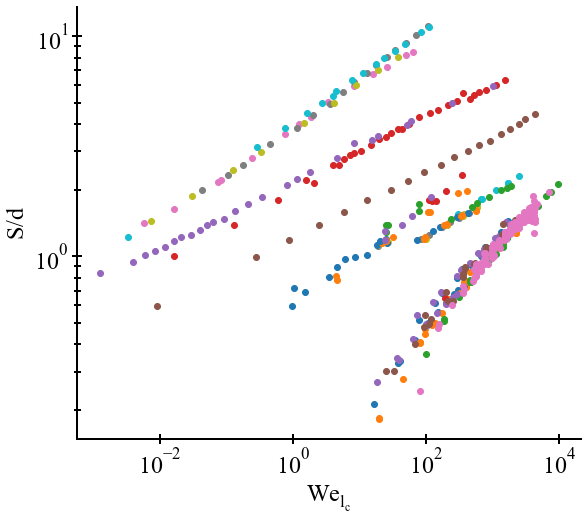

In [10]:
%matplotlib inline 
import swplot as swp

xscale_label = "log"
yscale_label = "log"
groupvar = "fluids"
xvar = "We_lc"
yvar = "S_D"
xlabel_name = "$\mathregular{We_{l_c}}$"
ylabel_name = "$\mathregular{S/d}$"
save_location = "C:\\Users\\sabbi\\Dropbox\\Darryl_James\\Mendeley_library\\JetEntrainment\\Selective\\Qualifying_docs\\SW_Python\\output\\S_dvsWe.png"


h = swp.disp_figure01(xscale_label, yscale_label, groupvar, xvar, yvar, xlabel_name, ylabel_name, total_data, save_location)


In [ ]:
from scipy.optimize import curve_fit
import numpy as np

# First we do the curve fitting:

# Fitting function
def func(x, a, b):
    # return a * np.exp(b * x)
    return a * x + b

# Initial guess for curve fitting
#initial = [1,1] #by default

# Perform curve fit
ppars1, pcov1 = curve_fit(func,data_single['We_lc_1_5'],data_single['S_d'])
ppars2, pcov2 = curve_fit(func,data_utube['We_lc_1_5'],data_utube['S_d'])


# X-values for the fitted function
xFit = np.linspace(start=0, stop=7, num=100)


In [ ]:
%matplotlib inline 
import swplot as swp

xscale_label = "linear"
yscale_label = "linear"
groupvar = "fluids"
xvar = "We_lc_1_5"
yvar = "S_d"
xlabel_name = "$\mathregular{We_{l_c}^{1/5}}$"
ylabel_name = "$\mathregular{S/d}$"
save_location = "C:\\Users\\sabbi\\Dropbox\\Darryl James\\Mendeley_library\\JetEntrainment\\Selective\\Qualifying_docs\\SW_Python\\output\\S_dvsWe_fittted.png"

h = swp.disp_figure_fit(xscale_label, yscale_label, groupvar, xvar, yvar, xlabel_name, ylabel_name, data_single, data_utube, xFit, ppars1, ppars2, save_location)

